In [13]:
import sympy as sy
from sympy import sin, cos, sqrt, log, exp, Matrix
import numpy as np
from matplotlib import pyplot as plt

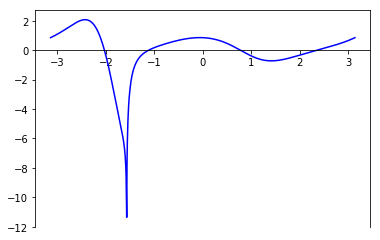

In [12]:
# problem 1
x = sy.symbols('x')
diff1 = sy.diff((sin(x) + 1)**(sin(cos(x))))
Df1 = sy.lambdify(x, diff1, "numpy")
#plotting
x_vals = np.linspace(-np.pi, np.pi, 1000)
y_vals = Df1(x_vals)
prob1_fig = plt.figure()
plt.plot(x_vals, y_vals, "b-")
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.show()

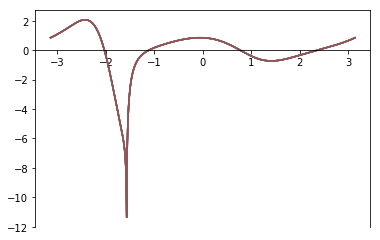

In [14]:
#problem 2
def forward1(f,x,h=1e-5):
    return (f(x+h)-f(x))/h
    
def forward2(f,x,h=1e-5):
    return (-3.*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
    
def back1(f,x,h=1e-5):
    return (f(x)-f(x-h))/h
    
def back2(f, x,h=1e-5):
    return (3.*f(x)-4.*f(x-h)+f(x-2*h))/(2.*h)

def centered1(f, x, h=1e-5):
    return .5*(f(x+h)-f(x-h))/h
    
def centered2(f, x, h=1e-5):
    return (f(x-2*h)-8.*f(x-h)+8.*f(x+h)-f(x+2*h))/(12*h)

f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))
prob2_fig = plt.figure()
plt.plot(x_vals, y_vals, "b-")

plt.plot(x_vals,forward1(f,x_vals),label='forward1')
plt.plot(x_vals,forward2(f,x_vals),label='forward2')
plt.plot(x_vals,back1(f,x_vals),label='back1')
plt.plot(x_vals,back2(f,x_vals),label='back2')
plt.plot(x_vals,centered1(f,x_vals),label='centered1')
plt.plot(x_vals,centered2(f,x_vals),label='centered2')

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.show()

In [ ]:
# prob 3
def prob3(x0):
    x_vals_log = np.log(-8, 0, 9)
    

In [ ]:
import numpy as np
from scipy import linalg as la
from sympy import sin, cos, sqrt, log, exp, Matrix
from sympy.utilities.lambdify import lambdify, implemented_function
from matplotlib import pyplot as plt
import autograd.numpy as anp
from autograd import grad, jacobian
import time
import sympy as sy

# Problem 1
def symbolic_differentiation(plot=True):
    x = sy.symbols('x')
    #g = lambda a: (np.sin(a)+1)**(np.sin(np.cos(a)))
    f = (sin(x)+1)**(sin(cos(x)))
    f = lambdify(x,f,'numpy')
    der = sy.diff((sin(x)+1)**(sin(cos(x))),x)
    df = lambdify(x,der,'numpy')
    if plot == True:
        dom = np.linspace(-np.pi,np.pi,100)
        plt.plot(dom,[f(x) for x in dom],label='f(x)')
        plt.plot(dom,df(dom),label='df(x)')
        ax = plt.gca()
        ax.spines["bottom"].set_position("zero")
        plt.legend(loc='lower right')
        plt.show()
    return f,df
    
# Problem 2
def forward1(f,pts,h=1e-5):
    return (f(pts+h)-f(pts))/h
    
def forward2(f,pts,h=1e-5):
    return (-3.*f(pts)+4*f(pts+h)-f(pts+2*h))/(2*h)
    
def back1(f,pts,h=1e-5):
    return (f(pts)-f(pts-h))/h
    
def back2(f,pts,h=1e-5):
    return (3.*f(pts)-4.*f(pts-h)+f(pts-2*h))/(2.*h)

def centered1(f, pts, h=1e-5):
    return .5*(f(pts+h)-f(pts-h))/h
    
def centered2(f, pts, h=1e-5):
    return (f(pts-2*h)-8.*f(pts-h)+8.*f(pts+h)-f(pts+2*h))/(12*h)
    
def test_prob2():
    g = lambda a: (np.sin(a)+1)**(np.sin(np.cos(a)))
    x = sy.symbols('x')
    f = (sin(x)+1)**(sin(cos(x)))
    f = lambdify(x,f,'numpy')
    der = sy.diff((sin(x)+1)**(sin(cos(x))),x)
    df = lambdify(x,der,'numpy')
    dom = np.linspace(-np.pi,np.pi,100)
    plt.plot(dom,[f(x) for x in dom],label='f(x)')
    plt.plot(dom,df(dom),label='df(x)')
    
    plt.plot(dom,forward1(g,dom),label='forward1')
    plt.plot(dom,forward2(g,dom),label='forward2')
    plt.plot(dom,back1(g,dom),label='back1')
    plt.plot(dom,back2(g,dom),label='back2')
    plt.plot(dom,centered1(g,dom),label='centered1')
    plt.plot(dom,centered2(g,dom),label='centered2')
    
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    plt.legend(loc='lower right')
    plt.show()

# Problem 2
def calculate_errors(f,df,pts,h = 1e-5):
    """Compute the errors using the centered difference quotient approximation.
    Inputs:
        f (function): the function for which the derivative will be
            approximated.
        df (function): the function of the derivative
        pts (array): array of values to calculate the derivative
    Returns:
        an array of the errors for the centered difference quotient
            approximation.
    """
    return np.abs(centered_difference_quotient(f,pts)-df(pts))

# Problem 3
def prob3(x0):
    hs = np.logspace(-8,0,9)
    f, df = symbolic_differentiation(plot=False)
    df_act = df(x0)
    for1 = []
    for2 = []
    backw1 = []
    backw2 = []
    center1 = []
    center2 = []
    """
    for h in hs:
        for1.append(abs(df_act-forward1(f,[x0],h=h)))
        for2.append(abs(df_act-forward2(f,[x0],h=h)))
        backw1.append(abs(df_act-back1(f,[x0],h=h)))
        backw2.append(abs(df_act-back2(f,[x0],h=h)))
        center1.append(abs(df_act-centered1(f,[x0],h=h)))
        center2.append(abs(df_act-centered2(f,[x0],h=h)))
    """
    errs = [for1,for2,backw1,backw2,center1,center2]
    plt.loglog(hs, [abs(df_act-forward1(f,[x0],h=h)) for h in hs], label="Order 1 forward")
    plt.loglog(hs, [abs(df_act-forward2(f,[x0],h=h)) for h in hs], label="Order 2 forward")
    plt.loglog(hs, [abs(df_act-back1(f,[x0],h=h)) for h in hs], label="Order 1 backward")
    plt.loglog(hs, [abs(df_act-back2(f,[x0],h=h)) for h in hs], label="Order 2 backward")
    plt.loglog(hs, [abs(df_act-centered1(f,[x0],h=h)) for h in hs], label="Order 2 centered")
    plt.loglog(hs, [abs(df_act-centered2(f,[x0],h=h)) for h in hs], label="Order 4 centered")
    plt.legend(loc='upper left')
    plt.show()
    
    
# Problem 4
def prob4():
    """Use centered difference quotients to calculate the speed v of the plane
    at t = 10 s
    Returns:
        (float) speed vf of plane
    """
    v = np.load('plane.npy')
    t = v[:,0]
    alpha = v[:,1]
    beta = v[:,2]
    a = 500
    alpha = np.pi/180.*alpha
    beta = np.pi/180.*beta
    x = a*(np.tan(beta))/(np.tan(beta)-np.tan(alpha))
    y = a*(np.tan(beta)*np.tan(alpha))/(np.tan(beta)-np.tan(alpha))
    dx = .5*x[2:]-.5*x[:-2]
    dx = np.concatenate((np.array([x[1]-x[0]]),dx,np.array([x[-1]-x[-2]])))
    dy = .5*y[2:]-.5*y[:-2]
    dy = np.concatenate((np.array([y[1]-y[0]]),dy,np.array([y[-1]-y[-2]])))
    v = (dx**2+dy**2)**.5
    return v

# Problem 5
def jacobian1(f, n, m, pt, h=1e-5):
    """Compute the approximate Jacobian matrix of f at pt using the centered
    difference quotient.
    Inputs:
        f (function): the multidimensional function for which the derivative
            will be approximated.
        n (int): dimension of the domain of f.
        m (int): dimension of the range of f.
        pt (array): an n-dimensional array representing a point in R^n.
        h (float): a float to use in the centered difference approximation.
    Returns:
        (ndarray) Jacobian matrix of f at pt using the centered difference
            quotient.
    """
    J = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            e = np.zeros(n)
            e[j] = 1.
            J[i][j] = (.5*f(pt+h*e)[i] - .5*f(pt-h*e)[i])/h
    return J



# Problem 6
def prob6():
    fnp = lambda x: np.log(np.sqrt(np.sin(np.sqrt(x))))
    fanp = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
    x = sy.symbols('x')
    f = log(sqrt(sin(sqrt(x))))
    x0 = np.pi/4
    start=time.clock()
    der = sy.diff(f,x)
    dfsy = lambdify(x,der,'numpy')
    act = dfsy(x0)
    print("Sympy took {} with error 0.".format(time.clock()-start))
    start=time.clock()
    approx1 = centered1(fnp,x0)
    print("Centered difference took {} with error {}".format(format(time.clock()-start),abs(approx1-act)))
    start=time.clock()
    grad_f = grad(fanp)
    print("Autograd took {} with error {}".format(format(time.clock()-start),abs(grad_f(x0)-act)))
    
    
# Problem 7
def taylor_sin(x, tol=0.0001):
    result = 0
    cur_term=x
    i = 0
    while np.abs(cur_term) >= tol:
        cur_term = (-1.)**i * (x ** (2*i+1) / (np.math.factorial(2*i+1)))
        result += cur_term
        i += 1
    return result
    
def prob7():
    f = lambda x: np.sin(x)
    dom = np.linspace(-np.pi,np.pi,100)
    d_tay_sin = grad(taylor_sin)
    d2_tay_sin = grad(d_tay_sin)
    plt.plot(dom, f(dom), label= "sin(x)",linewidth=3)
    plt.plot(dom, [d_tay_sin(x) for x in dom], label = "First derivative")
    plt.plot(dom, [taylor_sin(x) for x in dom], '--', label = "Taylor series")
    plt.plot(dom, [d2_tay_sin(x) for x in dom], label = "Second derivative")
    plt.legend(loc='upper right')
    plt.show()
    
    
# Problem 8
def prob8():
    """Compute the maximum error of jacobian() for the function
    f(x,y)=[(e^x)sin(y) + y^3, 3y - cos(x)] on the square [-1,1]x[-1,1].
    Returns:
        Maximum error of your jacobian function.
    """
    fnp = lambda x: np.array([np.exp(x[0])*np.sin(x[1]) + x[1]**3, 3.*x[1] - np.cos(x[0])])
    fanp = lambda x: anp.array([anp.exp(x[0])*anp.sin(x[1]) + x[1]**3, 3.*x[1] - anp.cos(x[0])])
    x = sy.symbols('x')
    y = sy.symbols('y')
    #g = [exp(x)*sin(y)+y**3,3*y-cos(x)]
    #g = lambda x,y: [exp(x)*sin(y) + y**3, 3.*y - cos(x)]
    g = Matrix([exp(x)*sin(y)+y**3,3*y-cos(x)])
    vars = Matrix([x,y])
    start = time.clock()
    der = g.jacobian(vars)
    dfsy = lambdify((x,y),der,'numpy')
    dfsy(1.,1.)
    print("Sympy took {} to calculate the jacobian".format(time.clock() - start))
    start = time.clock()
    jacobian1(fnp,2,2,[1.,1.])
    print("Centered difference quotient took {} to calculate the jacobian".format(time.clock() - start))
    start = time.clock()
    jacobian_f = jacobian(fanp)
    jacobian_f(anp.array([1.,1.]))
    print("Autograd took {} to calculate the jacobian".format(time.clock() - start))
    return jacobian_f(anp.array([1.,1.]))


if __name__ == "__main__":
    pass